![hexagram30 logo](https://raw.githubusercontent.com/hexagram30/resources/master/branding/logo/h30-logo-1-long-with-text-x688.png)

# Exploring Poplation Growth

## Notes

This notebook uses [Maxima](http://maxima.sourceforge.net/) and the [Maxima Jupyter kernel](https://github.com/robert-dodier/maxima-jupyter). The notebook was created to document an effort to build a societal/civilzation model for [Hexagram30](https://github.com/hexagram30/societatis). 

## Setup

Preperatory steps for using Maxima in Jupyter:

In [1]:
set_plot_option([svg_file, "./maxplot.svg"])$
load(draw)$

## Rate of Growth, Try 1

### Simple Logistics Equation

From the [Wikipedia article](https://en.wikipedia.org/wiki/Logistic_function) that describes population at time _t_:

$$P(t)=\frac{K}{1 + \frac{K - P_0}{P_0}e^{-rt}}$$

where $K$ is the carrying capacity of the area in question, $P_0$ is the population at $t=0$, and $r$ is the rate of growth. We give these some initial values here:

In [2]:
K:200;
P_0:150;
t_n:(60*60*24*365.25);
r:1/t_n;

(%o3)                                 200

(%o4)                                 150

(%o5)                             3.15576e+7

(%o6)                        3.168808781402895e-8

Note that initially, we arrived at a value for the rate trough trial and error, namely `0.0000001`, in that it turned out best results were had when it was within an order of magnitude of the inverse of the total time scale. With that realization in hand, we simply used that inverse value instead.

With the values above substituted in the equation, we get:

In [3]:
growth_eqn:(K/(1 + (K - P_0)/P_0 * %e^(-r*t)));

                                     200
(%o7)                   ------------------------------
                          - 3.168808781402895e-8 t
                        %e
                        -------------------------- + 1
                                    3

Note that we can get the latex for an expression, should we need to use it elsewhere, via the following:

In [4]:
tex(''growth_eqn);

(%o8)                                false

$$\frac{200}{\frac{e^ {- 3.168808781402895 \times 10^{-8}\,t }}{3}+1}$$


Now we can plot it over a year's timespan:

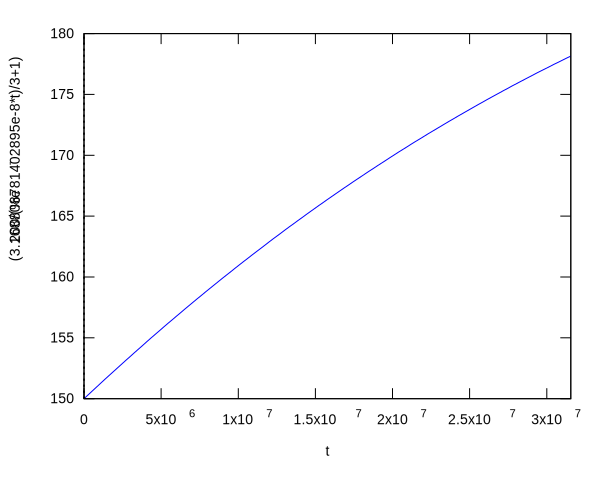

(%o9) [/var/folders/_j/0spgkqmj781_drg31_1tzgtr0000gn/T/maxout39771.gnuplot, 
                                                                 ./maxplot.svg]

In [5]:
plot2d(growth_eqn, [t, 0, t_n]);

or over 10 years:

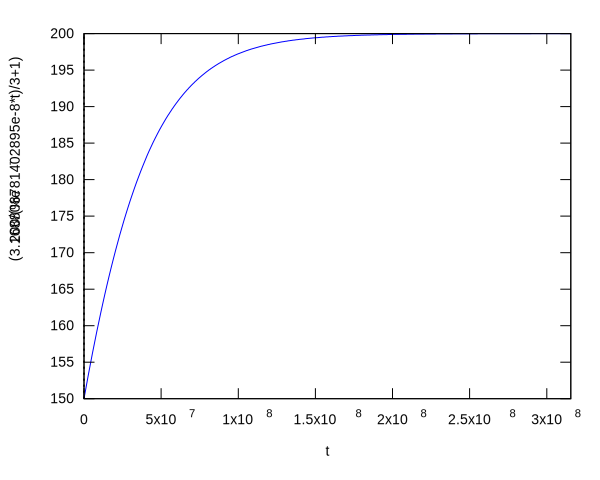

(%o10) [/var/folders/_j/0spgkqmj781_drg31_1tzgtr0000gn/T/maxout39771.gnuplot, 
                                                                 ./maxplot.svg]

In [6]:
plot2d(growth_eqn, [t, 0, 10*t_n]);

## Oscillating Stable Population

Next, we want to think about population dynamics with times of growth and die-off. To do this, we'll simply add a periodic component to our equation:

In [7]:
osc_eqn:K/50 * sin(t*r);
eqn:growth_eqn + osc_eqn;

(%o11)                   4 sin(3.168808781402895e-8 t)

                     200
(%o12)  ------------------------------ + 4 sin(3.168808781402895e-8 t)
          - 3.168808781402895e-8 t
        %e
        -------------------------- + 1
                    3

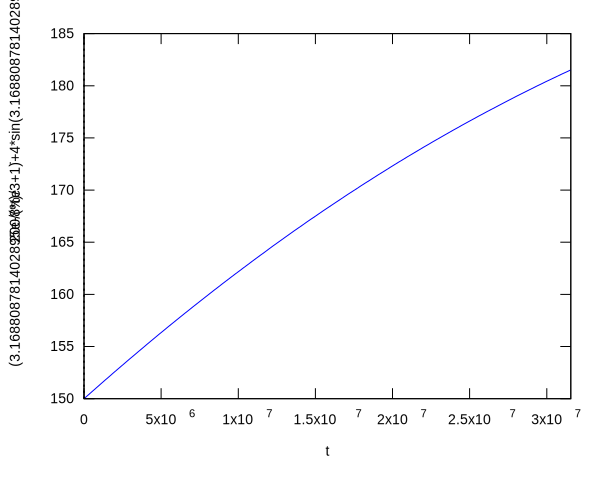

(%o13) [/var/folders/_j/0spgkqmj781_drg31_1tzgtr0000gn/T/maxout39771.gnuplot, 
                                                                 ./maxplot.svg]

In [8]:
plot2d(eqn, [t, 0, t_n]);

Over a period of a year, we don't see much with the currently defined constants, but given 10 years, we start to see a wobble:

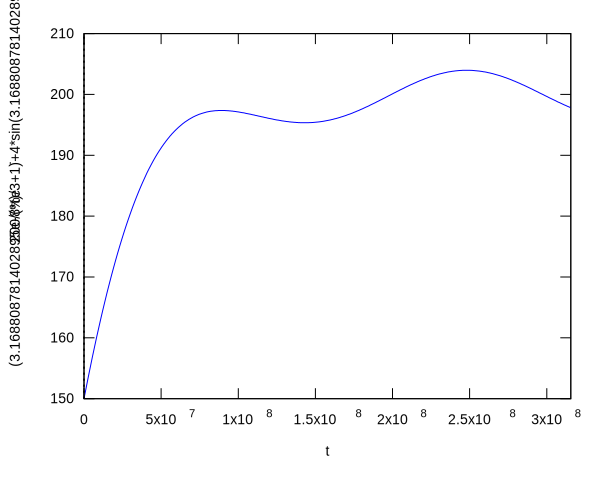

(%o14) [/var/folders/_j/0spgkqmj781_drg31_1tzgtr0000gn/T/maxout39771.gnuplot, 
                                                                 ./maxplot.svg]

In [9]:
plot2d(eqn, [t, 0, 10*t_n]);

and at 20 years, it's even more noticible:

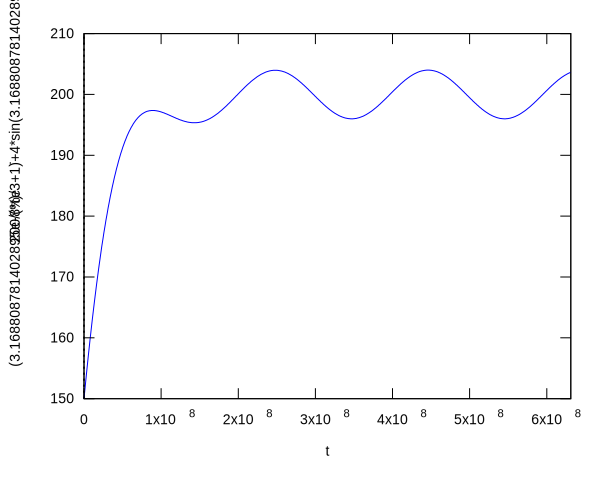

(%o15) [/var/folders/_j/0spgkqmj781_drg31_1tzgtr0000gn/T/maxout39771.gnuplot, 
                                                                 ./maxplot.svg]

In [10]:
plot2d(eqn, [t, 0, 20*t_n]);

## Rate of Growth, Try 2

### Simple Logistics Equation

We'll use the same constants and equation as we defined above for the growth equation. 

### Oscillating Part

However, for the oscillation part of the equation, we'll make some changes:

$$\frac{K}{\alpha}\sin \left(2\,\pi\,r\,t\right)$$

where $\alpha$ is the fraction of $K$ to use as the amplitude for the oscillations.

In [11]:
alpha:50;
osc_eqn:K/alpha*sin(2*%pi*r*t);

(%o16)                                50

(%o17)                 4 sin(6.33761756280579e-8 %pi t)

This gives us something that more resembles annual growth cycles (note that for the 20-year span below, there are 20 maxima/minima pairs):

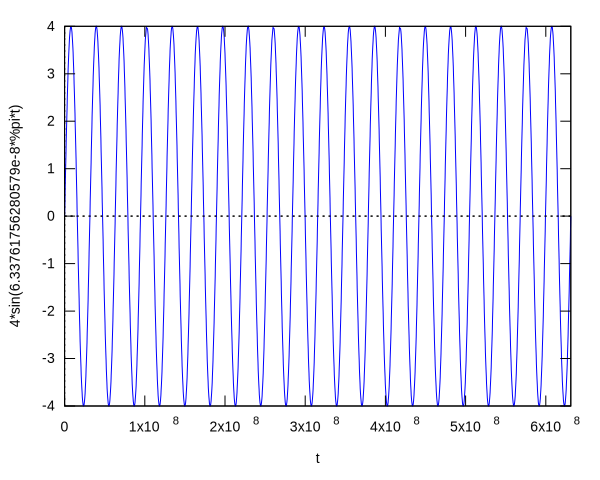

(%o18) [/var/folders/_j/0spgkqmj781_drg31_1tzgtr0000gn/T/maxout39771.gnuplot, 
                                                                 ./maxplot.svg]

In [12]:
plot2d(osc_eqn, [t, 0, 20*t_n]);

### Dampening Part

We'd also like to simulate an initial surge in growth that fades over time, stabilizing to simple periodic cycles. To do this, we'll use a dampening function:

$$\frac{K}{\omega}\,e^ {-\frac{rt}{4}}\sin \left(
 2 \pi r t\right)$$

where $\omega$ is the fraction of $K$ to overshoot (contributing to the amplitude) in the first dampening cycle.

In [13]:
omega:4;
damp_eqn:%e^(-r*t/omega)*K/4*sin(2*%pi*r*t);

(%o19)                                 4

              - 7.922021953507237e-9 t
(%o20)   50 %e                         sin(6.33761756280579e-8 %pi t)

Again, we use values that give us year-based cycles of increase and decline:

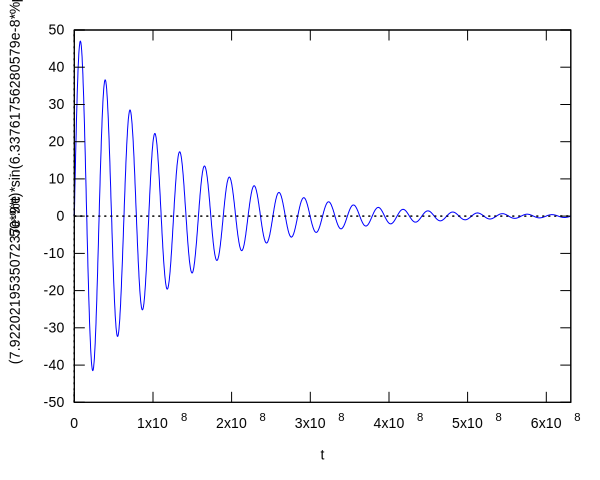

(%o21) [/var/folders/_j/0spgkqmj781_drg31_1tzgtr0000gn/T/maxout39771.gnuplot, 
                                                                 ./maxplot.svg]

In [14]:
plot2d(damp_eqn, [t, 0, 20*t_n]);

### Combined Eqation

Bringing these all together, we get the following population model for our second try:

$$P(t)=K\,\left(\frac{1}{1 + \frac{K - P_0}{P_0}e^{-r\,t}} + \frac{\sin \left(2\,\pi\,r\,t\right)}{50}+ \frac{e^ {-\frac{r\,t}{4}}}{4}\,\sin \left(2\,\pi\,r\,t\right)\right)$$

In [15]:
eqn:growth_eqn + osc_eqn + damp_eqn;

            - 7.922021953507237e-9 t
(%o22) 50 %e                         sin(6.33761756280579e-8 %pi t)
                                                              200
            + 4 sin(6.33761756280579e-8 %pi t) + ------------------------------
                                                   - 3.168808781402895e-8 t
                                                 %e
                                                 -------------------------- + 1
                                                             3

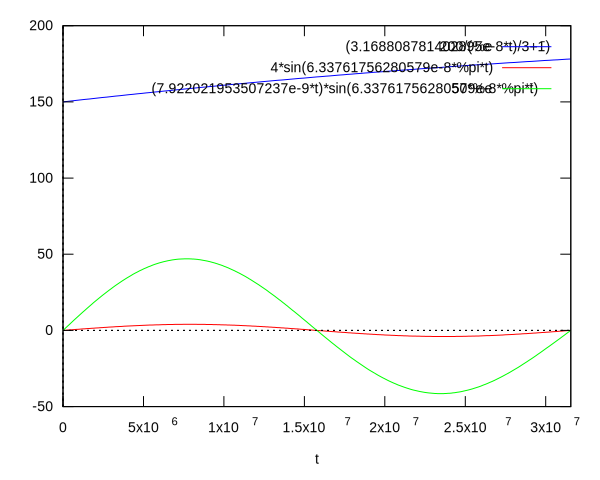

(%o23) [/var/folders/_j/0spgkqmj781_drg31_1tzgtr0000gn/T/maxout39771.gnuplot, 
                                                                 ./maxplot.svg]

In [16]:
plot2d([growth_eqn,osc_eqn,damp_eqn], [t, 0, t_n]);

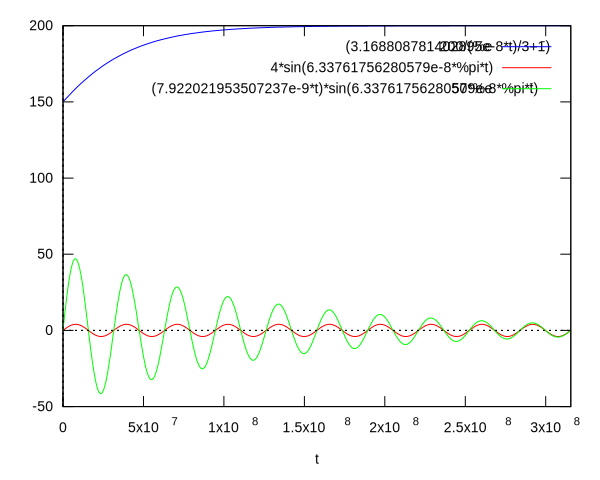

(%o24) [/var/folders/_j/0spgkqmj781_drg31_1tzgtr0000gn/T/maxout39771.gnuplot, 
                                                                 ./maxplot.svg]

In [17]:
plot2d([growth_eqn,osc_eqn,damp_eqn], [t, 0, 10*t_n]);

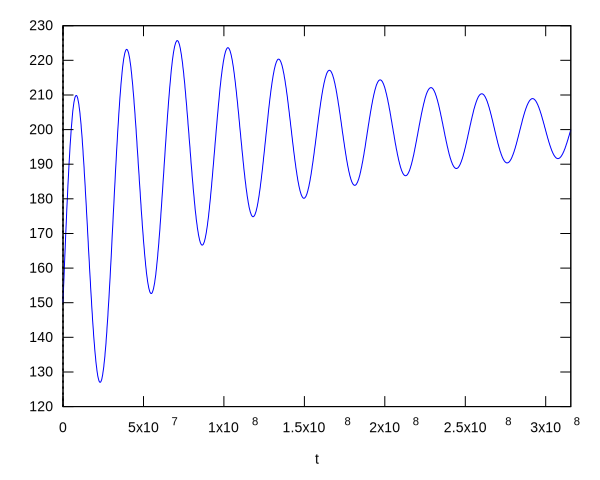

(%o25) [/var/folders/_j/0spgkqmj781_drg31_1tzgtr0000gn/T/maxout39771.gnuplot, 
                                                                 ./maxplot.svg]

In [18]:
plot2d([eqn], [t, 0, 10*t_n]);

## Rate of Growth, Combined Variants

(%o26)                                50

(%o27)                                 2

(%o28)                 4 sin(6.33761756280579e-8 %pi t)

               - 6.33761756280579e-8 t
(%o29)   100 %e                        sin(6.33761756280579e-8 %pi t)

             - 6.33761756280579e-8 t
(%o30) 100 %e                        sin(6.33761756280579e-8 %pi t)
                                                              200
            + 4 sin(6.33761756280579e-8 %pi t) + ------------------------------
                                                   - 3.168808781402895e-8 t
                                                 %e
                                                 -------------------------- + 1
                                                             3

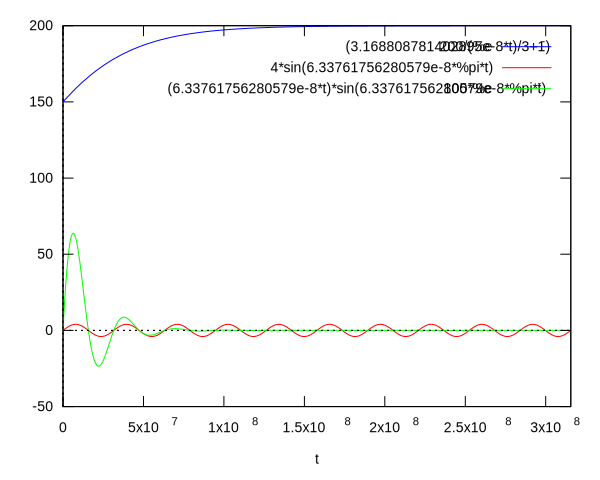

(%o31) [/var/folders/_j/0spgkqmj781_drg31_1tzgtr0000gn/T/maxout39771.gnuplot, 
                                                                 ./maxplot.svg]

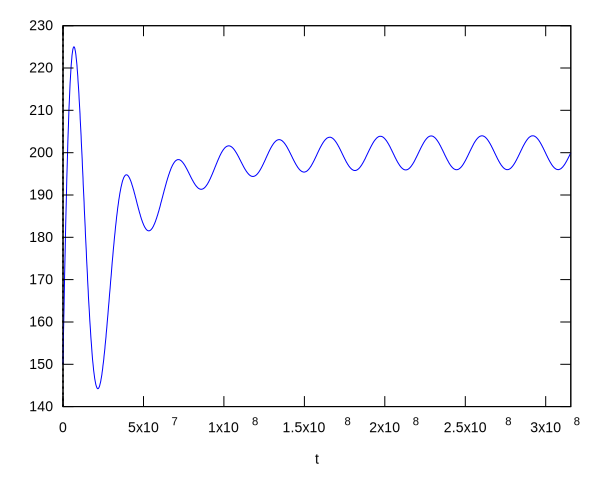

(%o32) [/var/folders/_j/0spgkqmj781_drg31_1tzgtr0000gn/T/maxout39771.gnuplot, 
                                                                 ./maxplot.svg]

In [19]:
alpha:50;
omega:2;
osc_eqn:K/alpha*sin(2*%pi*r*t);
damp_eqn:%e^(-r*t*omega)* K/omega*sin(2*%pi*r*t);
eqn:growth_eqn + osc_eqn + damp_eqn;
plot2d([growth_eqn,osc_eqn,damp_eqn], [t, 0, 10*t_n]);
plot2d([eqn], [t, 0, 10*t_n]);

## Food as a Limiting Factor

### Hunter-Gatherers

Below is a collection of graphs from a paper by Gary Belovsky on population dynamics in hunter-gatherer societies, In particular, the four graphs examine population growth over hundreds of years, where a periods of increase and decline is approximately 90 years. The differences in the graphs are the grams nutrients per square meter available to the hunter-gather groups.

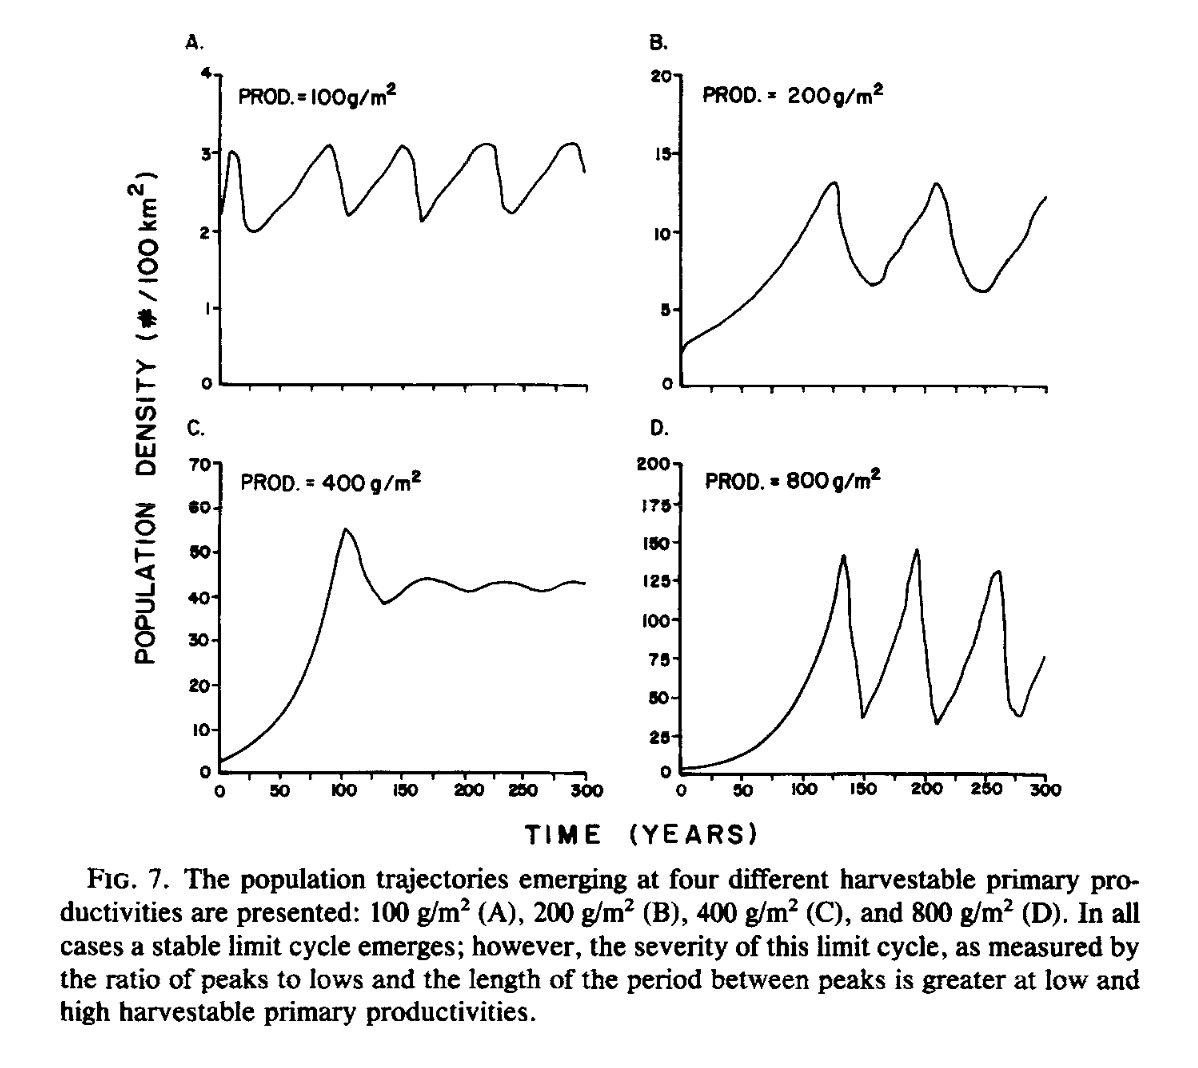

_Source_: Belovsky, Gary. (1988). An optimal foraging-based model of hunter-gatherer population dynamics. Journal of Anthropological Archaeology, 7, 343. doi: 10.1016/0278-4165(88)90002-5


### Under-Damped Second Order System

A typical transient response for an under-damped second order system showing the system characteristics. the damping factor is 0.5. The terms represented are:

1. $t_{p} =$ peak time (time required to reach the first peak)
1. $t_{d} =$ delay time (time to reach 50% of final value for the first time)
1. $t_{r} =$ rise time (time to rise from 0 to 100% value)
1. $M_{p} =$ maximum overshoot

$$\beta(\zeta) = \sqrt{1-\zeta^2}$$

$$\theta(\zeta) = arctan\left(\frac{\beta(\zeta)}{\zeta}\right)$$

$$h_{under}(t,\zeta) = 1 - \frac{1}{\beta(\zeta)} e^{-\zeta \, t} \sin(t \, \beta(\zeta)+\theta(\zeta))$$

_Source_: Transient response. (n.d.). In Wikipedia. Retrieved January 21, 2019, from https://en.wikipedia.org/wiki/Transient_response

In [20]:
beta(zeta) := sqrt(1-zeta^2);
theta(zeta) := atan(beta(zeta)/zeta);
h_under(zeta,t) := 1 - beta(zeta)^-1*exp(-zeta*t)*sin(t*beta(zeta)+theta(zeta));

                                                    2
(%o33)                   beta(zeta) := sqrt(1 - zeta )

                                            beta(zeta)
(%o34)                  theta(zeta) := atan(----------)
                                               zeta

                                         - 1
(%o35) h_under(zeta, t) := 1 - beta(zeta)    exp((- zeta) t)
                                                sin(t beta(zeta) + theta(zeta))

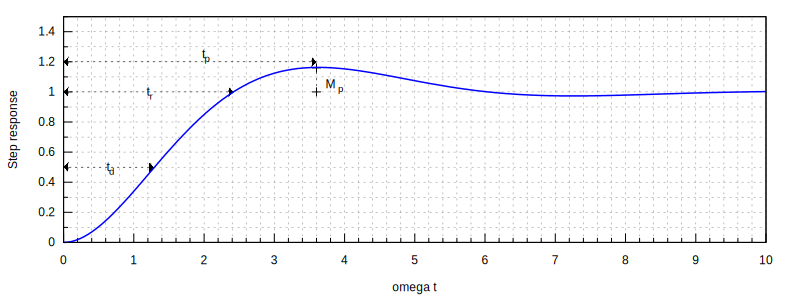

(%o36) [gr2d(points, vector, label, label, vector, label, vector, label, 
                                                                     explicit)]

In [21]:
draw2d(dimensions=[800,300],terminal=svg,
	 user_preamble="set mxtics; set mytics;",
	 grid=true, yrange=[0,1.5], xlabel="omega t",xtics=1,
	 key="",points_joined=true,
	 head_both=true,head_length=0.1,line_width=0.5,
	 line_type=dots,nticks=10,color=black,points([ [3.6,1],[3.6,1.16] ]),
	 vector([0,1.2],[3.6,0]),label(["t_p",2.0,1.25]),
	 label(["M_p",3.8,1.05]),
	 vector([2.42,1],[-2.42,0]),label(["t_r",1.21,1]),
	 vector([1.29,0.5],[-1.29,0]),label(["t_d",0.64,0.5]),
         line_width=1.5,line_type=solid,ylabel="Step response",nticks=100,
         color=blue,explicit(h_under(0.5, wt),wt,0,10)
	);

### Varying Damping Ratio on Second-Order System

We can view the equation above with different values for the damping ratio $\zeta$:

                                   - 1
(%o37) h_under(z, t) := 1 - beta(z)    exp((- z) t) sin(t beta(z) + theta(z))

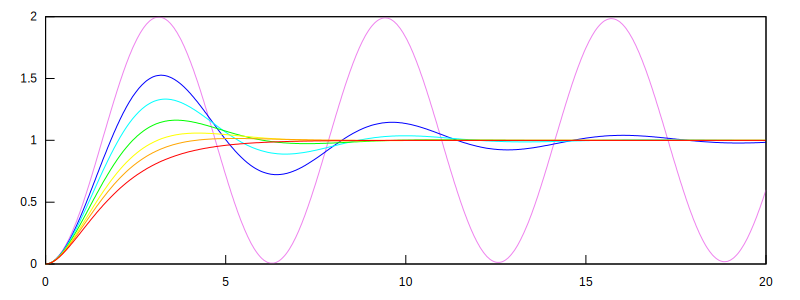

In [22]:
h(z,t) := 1 - beta(z)^-1*exp(-z*t)*sin(t*beta(z)+theta(z));

set_draw_defaults(dimensions=[800,300],
                  terminal=svg,
                  yrange=[0,2])$

draw2d(color=violet, 
       explicit(h(0.001,t),t,0,20),
       color=blue, 
       explicit(h(0.2,t),t,0,20),
       color=cyan, 
       explicit(h(0.33,t),t,0,20),
       color=green, 
       explicit(h(0.5,t),t,0,20),
       color=yellow,
       explicit(h(0.67,t),t,0,20),
       color=orange, 
       explicit(h(0.8,t),t,0,20),
       color=red, 
       explicit(h(0.999,t),t,0,20))$

Now lets compare the population growth/logistic equation and the damping equation:

$$P(t)=\frac{K}{1 + \frac{K - P_0}{P_0}e^{-rt}}$$

and 

$$h(t,\zeta) = 1 - \frac{1}{\beta(\zeta)} e^{-\zeta \, t} \sin(t \, \beta(\zeta)+\theta(\zeta))$$

Can we adapt the dampimg equation to model population growth?

                         K - P_0
(%o71) p(z, t) := K - (-----------) exp((- z) r t) sin(r t beta(z) + theta(z))
                       P_0 beta(z)

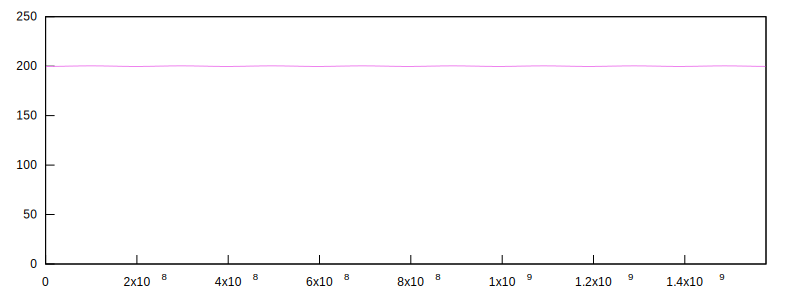

In [35]:
p(z,t) := K - (K - P_0)/(P_0 * beta(z))*exp(-z*r*t)*sin(r*t*beta(z)+theta(z));

set_draw_defaults(dimensions=[800,300],
                  terminal=svg,
                  yrange=[0,250])$
                  
draw2d(color=violet, 
       explicit(p(0.001,t),t,0,50 * t_n),
       color=blue, 
       explicit(p(0.2,t),t,0,20),
       color=cyan, 
       explicit(p(0.33,t),t,0,20),
       color=green, 
       explicit(p(0.5,t),t,0,20),
       color=yellow,
       explicit(p(0.67,t),t,0,20),
       color=orange, 
       explicit(p(0.8,t),t,0,20),
       color=red, 
       explicit(p(0.999,t),t,0,20))$